### TODO: 
- remove irrelevant lines
- try baseline LR model
- check how pre processing of other features allow to improve perf

## TODO:
- train LR model
    - hyper param optimize 
    - confusion metrics
    - AUC
    - precision recall curve
- visuzlize correct/ incorrect predictions
- embedding visulization
- dnn
    - confusion metrics
    - AUC
    - precision recall curve

In [1]:
!pip install tensorflow numpy pandas sklearn livelossplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.3 MB/s eta 0:00:00m eta 0:00:010:00:02
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
  Using cached livelossplot-0.5.5-py3-none-any.whl (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 10.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 9.7 MB/s eta 0:00:000m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.6 MB/s eta 0:00:00 MB/s eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 10.2 MB/s eta 0:00:0031m10.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 17.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 6.4 MB/s eta 0:00:0031m12.8 MB/s eta 0:00:01
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)
     

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached PyYAML-6.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (682 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.8 MB/s eta 0:00:00 MB/s eta 0:00:01
  Using cached fonttools-4.34.4-py3-none-any.whl (944 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached scipy-1.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 36.2 MB/s eta 0:00:00
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.2/160.2 kB 10.9 MB/s eta 0:00:00
  Using cached idna-3.3-py3-none-any.whl (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 10.0 MB

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

2022-08-15 01:53:59.295551: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-15 01:53:59.295601: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
from livelossplot import PlotLossesKeras


In [4]:
import os 
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
REDIT_200_TRAIN_DATASET = "../../data/reddit/reddit_200k_train.csv"
REDIT_200_TEST_DATASET = "../../data/reddit/reddit_200k_test.csv"

In [6]:
df_cols = ["prev_idx", "body", "score", "parent_id", "id", "created_date", "retrieved_date", "removed"]

TEXT_COLUMN = "body"

df_200_train = pd.read_csv(REDIT_200_TRAIN_DATASET, 
                           names=df_cols,    
                           skiprows=1,
                           encoding="ISO-8859-1")
df_200_test = pd.read_csv(REDIT_200_TEST_DATASET, 
                           names=df_cols,    
                           skiprows=1,
                           encoding="ISO-8859-1")
df = pd.concat([df_200_train, df_200_test])
df = df.drop(["prev_idx", "parent_id", "id", "retrieved_date" ], axis=1)
df.head()
# raw_train_input = dataset['body']
# raw_train_output = dataset['REMOVED']

,body,score,created_date,removed
0,I've always been taught it emerged from the ea...,2,1520121101,False
1,"As an ECE, my first feeling as ""HEY THAT'S NOT...",2,1506533157,True
2,Monday: Drug companies stock dives on good new...,5,1528087570,True
3,i learned that all hybrids are unfertile i won...,0,1504290041,False
4,Well i was wanting to get wasted tonight. Not...,3,1535140675,False


In [7]:
x = df.drop("removed", axis=1)
y = df["removed"].values

X_train, X_test, y_train, y_test = train_test_split(
    x,y,
    stratify=y,
    random_state=42,
    test_size=0.1, shuffle=True)

In [8]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=80000,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r',
    lower=True,
    split=' ',
    char_level=False,
    oov_token='<UNK>'
)

tokenizer.fit_on_texts(X_train[TEXT_COLUMN])
# Get our training data word index
word_index = tokenizer.word_index

In [9]:
def text_preprocessor(tokenizer, raw_data):
    # Encode training data sentenses into sequences
    train_sequences = tokenizer.texts_to_sequences(raw_data)
    embeded_data = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, 
        padding='post', truncating='post', maxlen=255)
    return embeded_data    

In [10]:
X_train_embedding = text_preprocessor(tokenizer, X_train[TEXT_COLUMN])

In [11]:
X_test_embedding = text_preprocessor(tokenizer, X_test[TEXT_COLUMN])


In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(80000, 16))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2022-08-15 01:54:29.653735: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-15 01:54:29.653765: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-15 01:54:29.653787: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (archBeast): /proc/driver/nvidia/version does not exist
2022-08-15 01:54:29.654538: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          1280000   
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,280,289
Trainable params: 1,280,289
Non-trainable params: 0
_________________________________________________________________


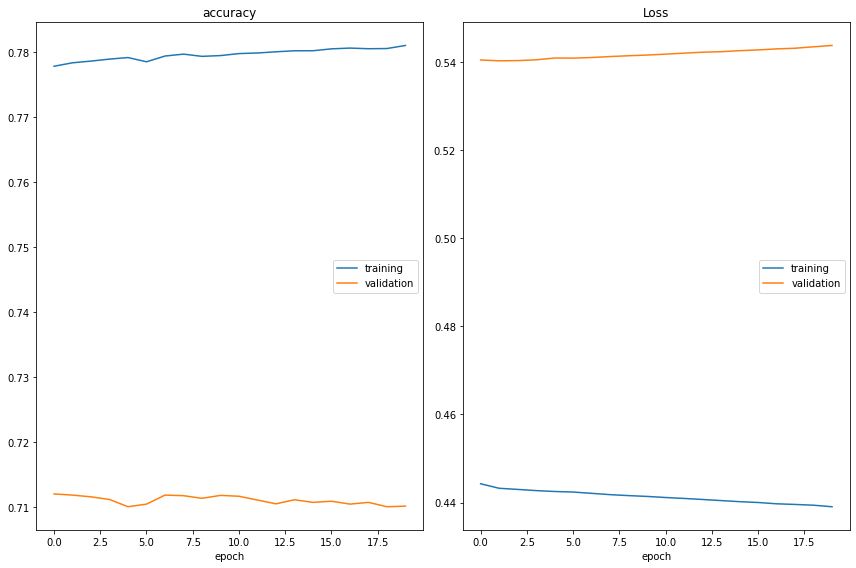

accuracy
	training         	 (min:    0.778, max:    0.781, cur:    0.781)
	validation       	 (min:    0.710, max:    0.712, cur:    0.710)
Loss
	training         	 (min:    0.439, max:    0.444, cur:    0.439)
	validation       	 (min:    0.540, max:    0.544, cur:    0.544)
21/21 [==============================] - 4s 172ms/step - loss: 0.4390 - accuracy: 0.7810 - val_loss: 0.5437 - val_accuracy: 0.7101


In [18]:
history = model.fit(X_train_embedding, y_train,
                    epochs=20,
                    batch_size=10000,
                    verbose=1,
                    validation_data=(X_test_embedding, y_test),
                    callbacks=[PlotLossesKeras()]
                   )

In [25]:
MODEL_SAVE_DIR='../../models/tf_nsfw_text_classifer'

In [26]:
# serialize model to JSON
model_json = model.to_json()
with open(f'{MODEL_SAVE_DIR}/keras-model-w2v.json', 'w') as json_file:
    json_file.write(model_json)
    
# serialize weight to HDF5
model.save(f'{MODEL_SAVE_DIR}/models/keras-model-w2v.h5')
print('saved model to disk')

saved model to disk


In [27]:
import pickle
with open(f'{MODEL_SAVE_DIR}/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [28]:
loss, accuracy = model.evaluate(X_train_embedding, y_train)
print(f"Training accuracy: {accuracy:.4f}, loss: {loss}")
loss, accuracy = model.evaluate(X_test_embedding, y_test)
print(f"Training accuracy: {accuracy:.4f}, loss: {loss}")

6283/6283 [==============================] - 5s 857us/step - loss: 0.4390 - accuracy: 0.7810
Training accuracy: 0.7810, loss: 0.4389979839324951
699/699 [==============================] - 1s 854us/step - loss: 0.5437 - accuracy: 0.7101
Training accuracy: 0.7101, loss: 0.5437356233596802


In [29]:
probabilities = model.predict(X_test_embedding)

699/699 [==============================] - 1s 755us/step


In [30]:
pred = probabilities > 0.5

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.76      0.77      0.76     13736
        True       0.62      0.62      0.62      8602

    accuracy                           0.71     22338
   macro avg       0.69      0.69      0.69     22338
weighted avg       0.71      0.71      0.71     22338



In [32]:
confusion_matrix(y_test, pred)

array([[10512,  3224],
       [ 3252,  5350]])

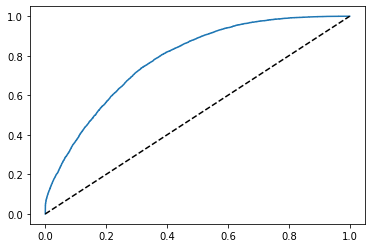

In [33]:
fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], 'k--')

In [34]:
print("AUC: ", roc_auc_score(y_test, pred))

AUC:  0.6936183388159788


In [35]:
sample = ["fu*k you bitch"]
encode = text_preprocessor(tokenizer, sample)

In [36]:
result = model.predict(encode)
result

1/1 [==============================] - 0s 15ms/step


array([[0.79752827]], dtype=float32)

In [37]:
result

array([[0.79752827]], dtype=float32)